In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

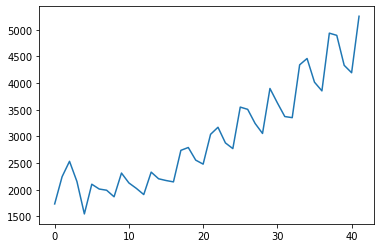

In [42]:
coke=pd.read_csv("/content/CocaCola_Sales_Rawdata.csv")
coke.Sales.plot()

In [43]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [44]:
Train = coke.head(38)
Test = coke.tail(5)

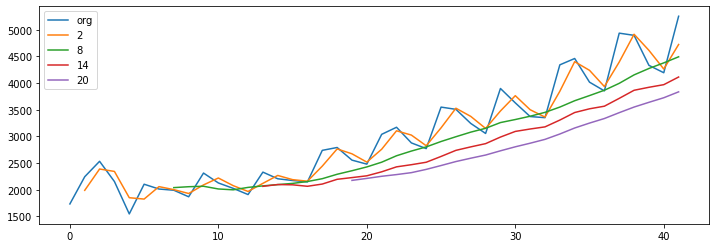

In [45]:
plt.figure(figsize=(12,4))
coke.Sales.plot(label="org")
for i in range(2,24,6):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

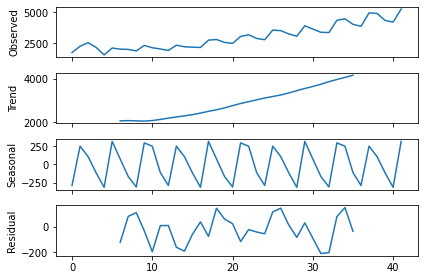

In [46]:
decompose_ts_add = seasonal_decompose(coke.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

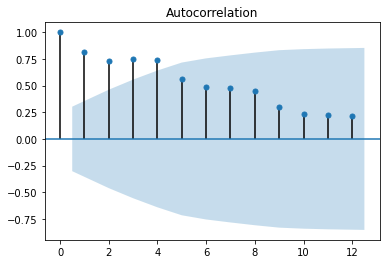

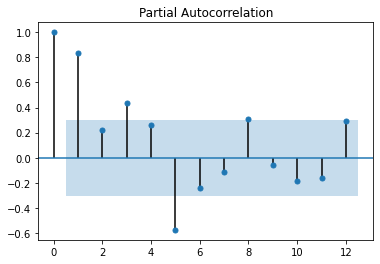

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

In [48]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [49]:
#Simple Exponential MAPE
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

15.172760553490164

In [50]:
#holt method with additive seasonality and additive trend
hwe_model_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add = hwe_model_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add,Test.Sales) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


4.537674522614084

In [51]:
#holt method with multiplicative seasonality and additive trend
hwe_model_mul= ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul= hwe_model_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2.7840952557394956

In [52]:
hwe_model_mul= ExponentialSmoothing(coke["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [53]:
#Forecasting for next 10 time periods
hwe_model_mul.forecast(10)

42    4999.395699
43    4597.654326
44    4356.353750
45    5342.207704
46    5283.638647
47    4749.926483
48    4499.550647
49    5730.786567
50    5681.495443
51    4994.644414
dtype: float64